In [1]:
%pylab --no-import-all inline
import pandas as pd
import seaborn as sns
from sklearn import datasets

Populating the interactive namespace from numpy and matplotlib


# Model Representation

In [2]:
training_set = pd.read_csv('data/house_pricing.csv').drop('rooms', axis=1)
training_set.head()

,sqf,price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


---
$m = $ number of training examples 

In [3]:
m = len(training_set)
m

47

---
$x =$ input variable / features

In [4]:
x = training_set.sqf
x.head()

0    2104
1    1600
2    2400
3    1416
4    3000
Name: sqf, dtype: int64

---
$y =$ output variable / target

In [5]:
y = training_set.price
y.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: price, dtype: int64

To establish notation for future use, we’ll use $x^{(i)}$ to denote the “input” variables, also called input features, and $y^{(i)}$ to denote the “output” or target variable that we are trying to predict. 

So $x^{(2)}$ is the second (if we count from 1 as it is common in math) or the third (if we count from 0 as it is common in computer science) row of $x$

In [6]:
x[2]  # python starts from 0 so x[2] represents the 3rd row

2400

  
A pair $\left(x^{(i)} , y^{(i)}\right)$ is called a training example, and the dataset that we’ll be using to learn (a list of $m$ training examples) is called a training set. Note that the superscript $^{(i)}$ in the notation is simply an index into the training set, and has nothing to do with exponentiation. We will also use $X$ to denote the space of input values, and $Y$ to denote the space of output values. In this example, $X = Y = \mathbb{R}$. 

To describe the supervised learning problem slightly more formally, our goal is, given a training set, to learn a function $h : X \to Y$ so that $h(x)$ is a “good” predictor for the corresponding value of $y$. For historical reasons, this function $h$ is called a hypothesis. Seen pictorially, the process is therefore like this:

![ML](./data/img/ML-flowchart.png)

When the target variable that we’re trying to predict is continuous, such as in our housing example, we call the learning problem a regression problem. When $y$ can take on only a small number of discrete values (such as if, given the living area, we wanted to predict if a dwelling is a house or an apartment, say), we call it a classification problem.

### How do we represent $h$?
The output of a machine learning algorythm is a function $h$. But how do we represent $h$?. Our initial choice is to represent $h$ as a linear function:

$$y = h_\theta(x) = \theta_0 + \theta_1x$$

Sometimes, we might want to use more complex non-linear functions, but this is the simplest building block of regression algorithms which can be built upon later.

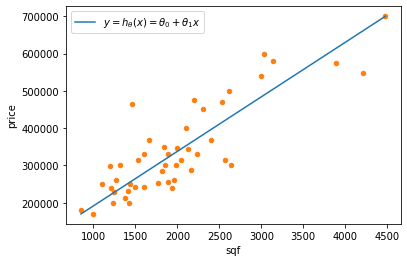

In [7]:
ax = training_set.plot.scatter(x='sqf', y='price', c='C1')
ax.plot(*np.array([training_set.min(),  training_set.max()]).T, 
        label='$y = h_\\theta(x) = \\theta_0 + \\theta_1x$')
ax.legend();

where $\theta_0$ is the offset of $y$ from 0; $\theta_1$ is the slope of the line, since it scales how much $y$ varies compared to $x$.

# Cost Function
We can measure the accuracy of our hypothesis function by using a cost function. The cost function calculates the **distance** of predicted data from observed data, obviously we want our predicted data to be as close as possible to truth values, in other words we want to **minimize** the distance from truth values.

This version of cost function takes an average difference (actually a fancier version of an average) of all the results of the hypothesis with inputs from $x$ and the actual output $y$.

$$\begin{align}
J(\theta_0,\theta_1) & = \frac{1}{2m}\sum^m_{i=1}\left(\hat{y}_i-y_i\right)^2 \\
& = \frac{1}{2m}\sum^m_{i=1}\left(h_{\theta}(x_i) - y_i \right)^2 \\
& = \frac{1}{2m}\sum^m_{i=1}\left(\left(\theta_0 + \theta_{1}x^{(i)}\right) - y_i \right)^2 
\end{align}$$

To break it apart, it is $\frac{1}{2} \bar{x}$ where $\bar{x}$ is the mean of the squares of $h_\theta (x_{i}) - y_{i}$ or the difference (**distance**) between the predicted value and the actual value.

This function is otherwise called the "Squared error function", or "Mean squared error". The mean is halved $\left(\frac{1}{2}\right)$ as a convenience for the computation of the gradient descent, as the derivative term of the square function will cancel out the $\frac{1}{2}$ term.

---
The idea is to chose $\theta_0, \theta_1$ to so that $h_\theta(x)$ is close to $y$ for each training example $(x,y)$. In other words we want to chose $\theta_0, \theta_1$ to minimize the cost function $J\left(\theta_0, \theta_1 \right)$

---
If we try to think of it in visual terms, our training data set is scattered on the $x,y$ plane. We are trying to make a straight line (defined by $h_\theta(x)$) which passes through these scattered data points. 

Our objective is to get the best possible line. The best possible line will that line for which the average squared vertical distance of the scattered points from the line will be the least. Ideally, the line should pass through all the points of our training data set. In such a case, the value of $J(\theta_0, \theta_1)$ would be 0. The following example shows the ideal situation where we have a cost function of 0. 

For a simplified version of the regression hypothesis $h_\theta(x)$ where we removed the offset ($\theta_0$):

$$h_\theta(x)=\theta_1x$$

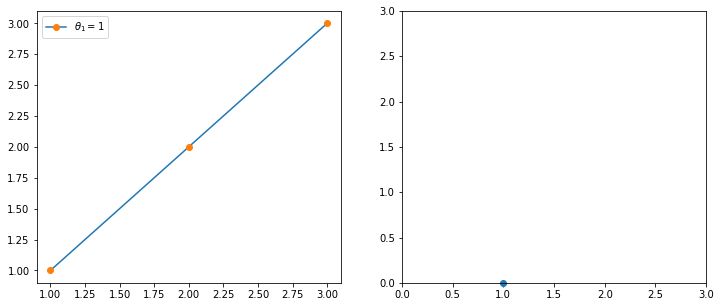

In [37]:
fig, [ax1, ax2] = plt.subplots(1, 2 ,figsize=(12, 5))
x = np.linspace(1,3,3)
ax1.plot(x, x, marker='o', markerfacecolor='C1', markeredgecolor='C1', label='$\\theta_1=1$');
line, *_ = ax2.plot([1], [0], marker='o')
line.set_clip_on(False)
ax1.legend()
ax2.set_xlim(0, 3)
ax2.set_ylim(0, 3);

$$
\begin{align}
J(\theta_1) &= \frac{1}{2m}(0^2+0^2+0^2) \\
&= 0
\end{align}
$$

When $\theta_1 = 1$, we get a slope of 1 which goes through every single data point in our model. Conversely, when $\theta_1 = 0.5$, we see the vertical distance from our fit to the data points increase. 

(0.0, 3.1)

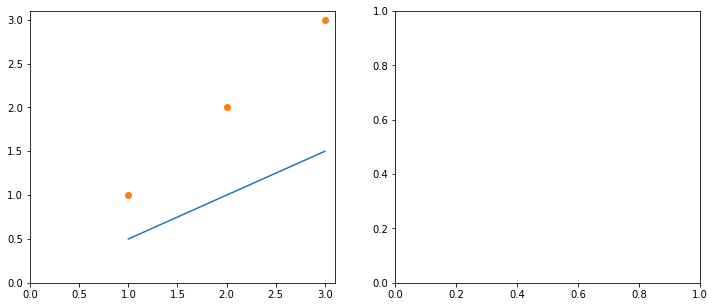

In [40]:
fig, [ax1, ax2] = plt.subplots(1, 2 ,figsize=(12, 5))
x = np.linspace(1,3,3)
ax1.plot(x, x*0.5)
line, *_ = ax1.plot(x, x, marker='o', ls='none', markerfacecolor='C1', markeredgecolor='C1', label='$\\theta_1=1$')
ax1.set_xlim(0, 3.1)
ax1.set_ylim(0, 3.1)